In [1]:
import os

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


In [20]:
in_csv_file = "/Users/szhan/Projects/tsimpute/viz/sts.sisu42_into_sisu3.imputation.results.csv"
out_png_file = "/Users/szhan/Projects/tsimpute/viz/sts.sisu42_into_sisu3.imputation.results.png"

df = pd.read_csv(in_csv_file, comment="#")
df = df[["ref_minor_allele_freq", "iqs"]].dropna(axis=0)

In [9]:
values = np.vstack([df["ref_minor_allele_freq"], df["iqs"]])
kernel = stats.gaussian_kde(values)
x = kernel(np.vstack([df["ref_minor_allele_freq"], df["iqs"]]))


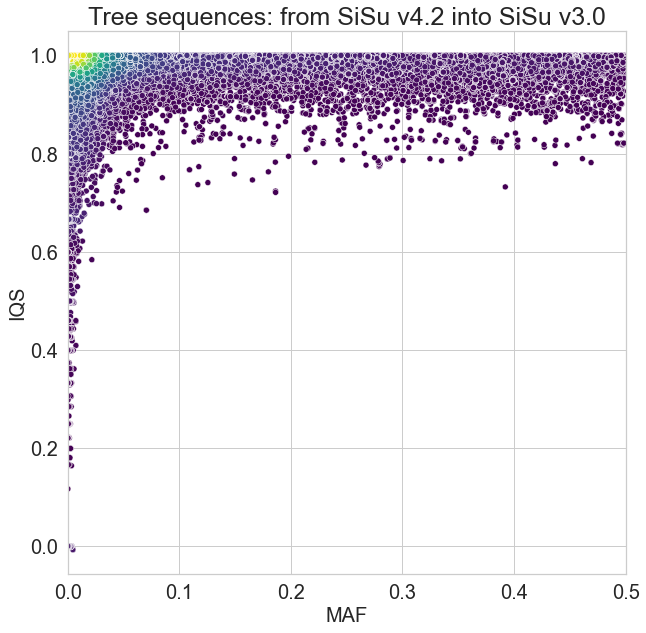

In [25]:
max_maf = 0.50

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title(
    f"Tree sequence: from SiSu v4.2 into SiSu v3.0",
    size=25
)

ax.set_xlim([0, max_maf])

ax.set_ylabel("IQS", size=20)
ax.set_xlabel("MAF", size=20)

ax.tick_params(axis='both', which='major', labelsize=20)

g = sns.scatterplot(
    y="iqs",
    x="ref_minor_allele_freq",
    data=df,
    c=x,
    cmap="viridis",
    #x_jitter=True,
    ax=ax
)

g.get_figure().savefig(out_png_file, dpi=1000)